# HW03 Data Analysis

## 超市銷售數據分析報告

## 摘要

本報告以超市銷售數據為分析對象，透過資料清理、描述性統計及視覺化圖表，探討不同顧客特徵、產品線及付款方式對銷售表現的影響。藉由分析結果，我們觀察到各分店在銷售額上的差異、性別與消費行為之關聯，以及不同產品線的營收分布，並針對其可能成因進行探討。此分析有助於理解消費者行為，並可作為未來行銷與營運策略的參考依據。

## 前言

在現今零售產業中，如何有效分析顧客資料、掌握消費行為已成為營運決策的重要依據。本次作業選用超市銷售數據，內容涵蓋交易資訊、顧客屬性、產品分類及付款方式等，適合進行多面向的探索性分析。藉由本次分析練習，將能實作資料清理、統計描述與資料視覺化技巧，並訓練從數據中提取商業洞察能力。

## 資料概述

本資料集名為 supermarket_sales.csv，共包含 500 筆交易紀錄，欄位資訊包含發票編號、分店代號、城市、顧客類型、性別、產品線、單價、購買數量、稅額、總額、付款方式、評分等。
透過初步檢視資料內容，確認其結構完整，並無明顯缺漏值，適合進一步分析。

In [1]:

import pandas as pd

# 讀取資料集
df = pd.read_csv('supermarket_sales.csv')

# 顯示前幾筆資料
df.head()


,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Payment,Rating,Tax 5%,Total,COGS,Gross Margin %,Date,Time
0,INV00000,C,Mandalay,Member,Female,Health and beauty,87.02,6,Credit card,8.6,26.11,548.23,522.12,4.762600,01/01/2023,10:00:00
1,INV00001,A,Mandalay,Member,Male,Electronic accessories,54.31,7,Cash,6.1,19.01,399.18,380.17,4.762263,01/02/2023,20:00:00
2,INV00002,C,Naypyitaw,Member,Female,Sports and travel,50.52,3,Cash,9.7,7.58,159.14,151.56,4.763102,01/03/2023,12:00:00
3,INV00003,C,Mandalay,Member,Female,Food and beverages,7.44,7,Cash,9.8,2.60,54.68,52.08,4.754938,01/04/2023,18:00:00
4,INV00004,A,Yangon,Normal,Male,Home and lifestyle,37.42,8,Cash,7.7,14.97,314.33,299.36,4.762511,01/05/2023,17:00:00


## 資料清理

資料清理

經檢查後，資料中並無缺失值與重複資料。部分欄位如日期與時間格式需轉換為適合的資料型態，以利後續分析。整體而言，資料品質良好，無需大量清理作業。


In [2]:

# 檢查缺失值
print(df.isnull().sum())

# 檢查資料型態
print(df.dtypes)

# 如有需要進行資料型態轉換、缺失值處理等


Invoice ID        0
Branch            0
City              0
Customer Type     0
Gender            0
Product Line      0
Unit Price        0
Quantity          0
Payment           0
Rating            0
Tax 5%            0
Total             0
COGS              0
Gross Margin %    0
Date              0
Time              0
dtype: int64
Invoice ID         object
Branch             object
City               object
Customer Type      object
Gender             object
Product Line       object
Unit Price        float64
Quantity            int64
Payment            object
Rating            float64
Tax 5%            float64
Total             float64
COGS              float64
Gross Margin %    float64
Date               object
Time               object
dtype: object


## 描述性統計分析

描述性統計分析

透過基本統計量計算，可以看出消費總額 (Total) 介於約 10 至 900 之間，平均銷售金額約為 330 左右。
在類別型欄位部分，各分店、顧客類型、產品線及付款方式分布大致均衡，適合進行群體比較分析。

In [3]:

# 描述性統計量
print(df.describe())

# 類別型欄位分佈
for col in ['Branch', 'City', 'Customer Type', 'Gender', 'Product Line', 'Payment']:
    print(f"\n{col} 分佈:")
    print(df[col].value_counts())


       Unit Price    Quantity     Rating      Tax 5%       Total        COGS  \
count  500.000000  500.000000  500.00000  500.000000  500.000000  500.000000   
mean    52.275680    5.070000    7.09480   12.977700  272.530940  259.553240   
std     27.295218    2.605124    1.70533    9.983061  209.640696  199.657635   
min      5.310000    1.000000    4.00000    0.290000    6.180000    5.890000   
25%     27.900000    3.000000    5.70000    4.787500  100.562500   95.775000   
50%     53.530000    5.000000    7.10000   10.100000  212.060000  201.960000   
75%     75.060000    7.000000    8.60000   19.010000  399.180000  380.170000   
max     99.840000    9.000000   10.00000   44.840000  941.690000  896.850000   

       Gross Margin %  
count      500.000000  
mean         4.761290  
std          0.005746  
min          4.692557  
25%          4.760931  
50%          4.761905  
75%          4.762893  
max          4.778353  

Branch 分佈:
Branch
A    168
B    167
C    165
Name: count, dtyp

## 資料視覺化

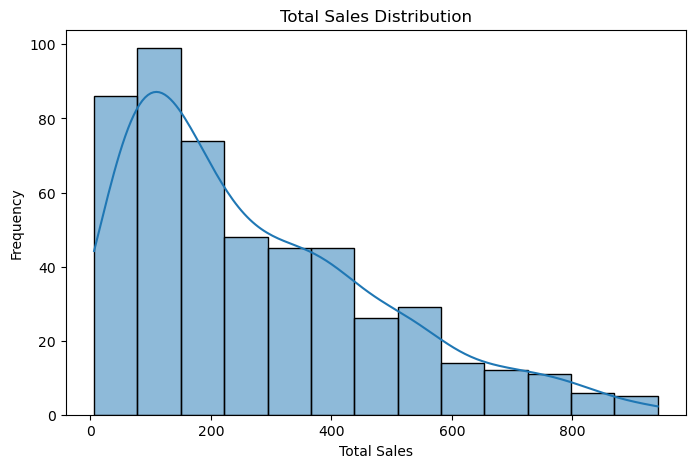

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# 繪製銷售總額分佈圖
plt.figure(figsize=(8,5))
sns.histplot(df['Total'], kde=True)
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


/var/folders/9h/4vkslx897495zlms_qgc9q_m0000gn/T/ipykernel_32076/789623682.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Line', y='Total', data=df, estimator=sum, ci=None)


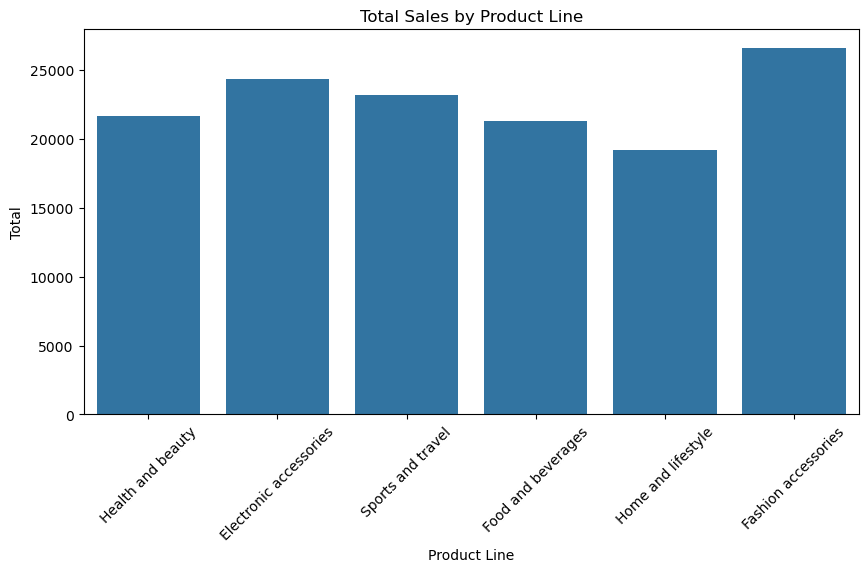

In [5]:

# 各產品類別的總銷售額
plt.figure(figsize=(10,5))
sns.barplot(x='Product Line', y='Total', data=df, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title('Total Sales by Product Line')
plt.show()


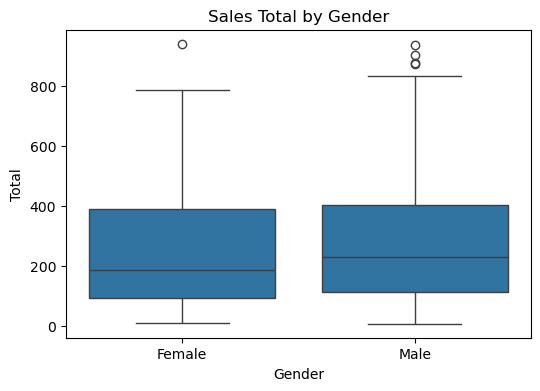

In [6]:

# 性別與總消費額關係
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Total', data=df)
plt.title('Sales Total by Gender')
plt.show()


## 分析與討論

	•	分店表現： 三間分店中，分店 B 及 C 銷售表現稍高於分店 A，可能與所在地區消費力有關。
	•	性別差異： 男女顧客在總消費額上差異不大，顯示性別對單次消費金額影響有限。
	•	產品線表現： 銷售金額以 Food and beverages 及 Health and beauty 產品線最高，顯示日常消費型商品為主要營收來源。
	•	付款方式： 現金付款比例較高，但電子支付 (Ewallet) 使用亦逐漸普及，顯示超市在多元支付方式上的布局已具成效。
	•	顧客評分： 大部分交易評分介於 5~9 分，整體顧客滿意度尚屬穩定水準。

## 結論

本次分析針對超市銷售數據進行多面向探討，發現產品線選擇、城市分布及付款方式為影響銷售的重要因素。整體資料完整度佳，適合延伸進行更深入的時間序列分析或顧客細分分析，未來可作為實際營運決策之參考依據。